##A2: Unsupervised learning with PCA

Dataset: A3-data.txt

PCA: find and plot the PCA projection in two dimensions, using a different color for each class. For each PCA analysis you should include 2 plots: a colored scatter plot of the first two principal components, and a scree plot with the accumulated variance.

## Import modules

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Loading dataset

In [3]:
# Load training data
filename = 'A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]



## Separarting & standardize the data

Separating out the features & the target
This is intended to divide the data into the following parts. one that contains the characteristic variables and one that contains the dependent variable that you are trying to predict.

We standardize with the input data (features). Standardization transforms data to have a mean of 0 and a standard deviation of 1.

In [4]:
features = ['x', 'y', 'z', 't']
target = ['class']

# Separating out the features
#x = df.loc[:, features].values
x = df.loc[:, features].to_numpy()

# Separating out the target (class)
#y = df.loc[:, target].values
y = df.loc[:, target].to_numpy()

# Standardizing the features
x = StandardScaler().fit_transform(x)

## PCA Projection to 2D
Using Principal component analysis, in our case original data with 4 columns, reduce it onto a two dimensional space.


In [5]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])


print("original shape:   ", x.shape)
print("transformed shape:", principal_components.shape)

print(principal_df)

final_df = pd.concat([principal_df, df[['class']]], axis = 1)

print(final_df)

original shape:    (360, 4)
transformed shape: (360, 2)
     principal component 1  principal component 2
0                -1.615413              -0.461632
1                 0.499510               0.700627
2                 0.603876              -0.296531
3                -0.726266               0.649637
4                 0.633048               0.427483
..                     ...                    ...
355               1.071133               1.419143
356               0.404593               0.104707
357              -2.159519               0.628094
358              -2.000091              -0.313355
359               0.847054              -0.846901

[360 rows x 2 columns]
     principal component 1  principal component 2  class
0                -1.615413              -0.461632      1
1                 0.499510               0.700627      5
2                 0.603876              -0.296531      2
3                -0.726266               0.649637      1
4                 0.633048         

## Explained Variance
For the following values: [1.25891367, 0.95489232].
It represents the variance by its respective principal component (in units).
for the following values: [0.31385417, 0.23805996].
It represents the variance by its respective principal component (in %).

0.31385417 -- 23.81% total variance

0.23805996 -- 23.8 % total variance

In [6]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.25891367 0.95489232]
[0.31385417 0.23805996]


## 2D Projection

[1, 2, 3, 4, 5, 6]


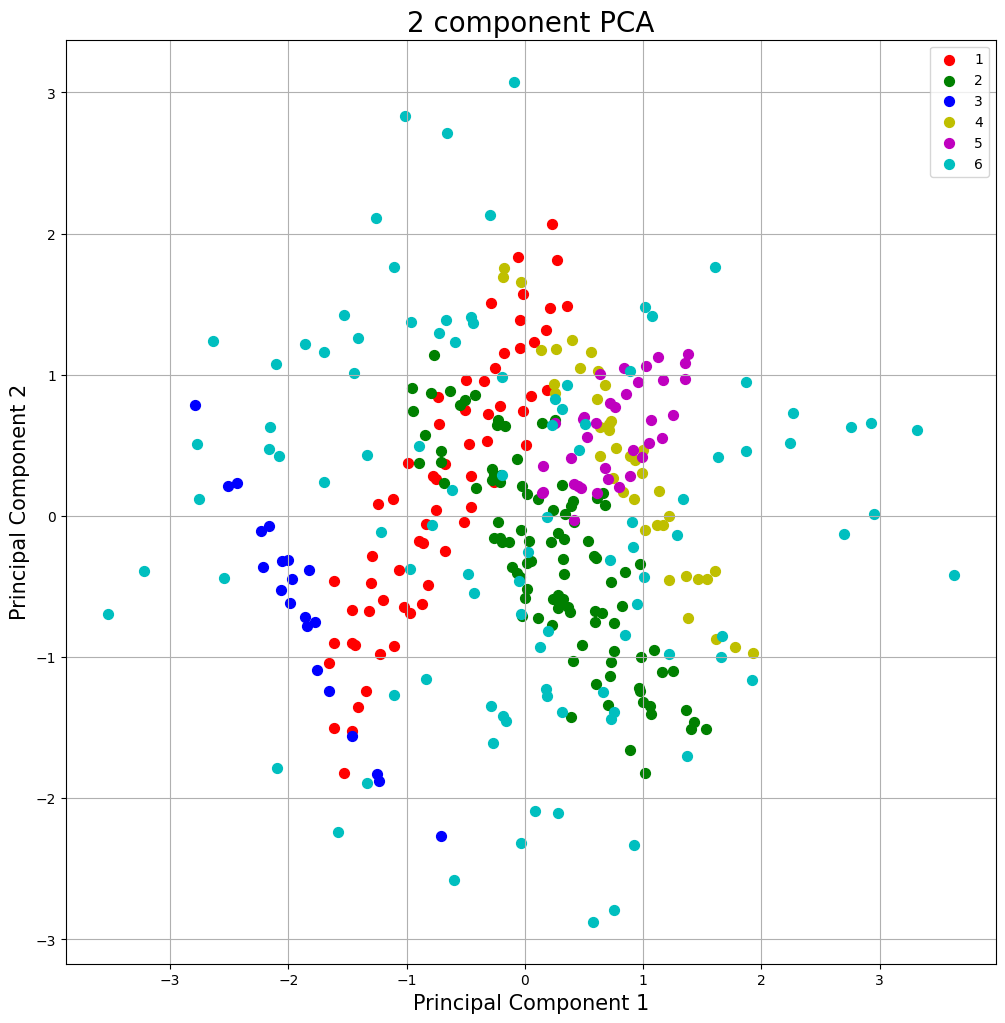

In [9]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = sorted(df['class'].unique())
print(targets)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['class'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()